<a href="https://colab.research.google.com/github/Prathamesh202/BlogPage/blob/main/techsem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -q kaggle
!pip install -q opendatasets
!pip install split-folders

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import opendatasets as od
from numpy.ma.core import true_divide
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import splitfolders
from keras.api._v2.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import RandomFlip,RandomRotation,RandomZoom,RandomHeight,RandomWidth
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.applications.efficientnet import EfficientNetB3,EfficientNetB5,EfficientNetB2
from keras.layers import Flatten, Dense,Dropout,Input,Activation
from keras.layers import GlobalAveragePooling2D
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [5]:
od.download(
    "https://www.kaggle.com/datasets/aryashah2k/indian-medicinal-leaves-dataset"
    )

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shrikantj14
Your Kaggle Key: ··········


100%|██████████| 9.00G/9.00G [01:37<00:00, 98.8MB/s]


In [6]:

for dirpath,dirnames,filenames in os.walk("indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets'.
There are 80 directories and 0 images in 'indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset'.
There are 0 directories and 66 images in 'indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset/Parijatha'.
There are 0 directories and 51 images in 'indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset/Malabar_Nut'.
There are 0 directories and 89 images in 'indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset/Arali'.
There are 0 directories and 70 images in 'indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset/Spinach1'.
There are 0 directories and 69 images in 'indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset/Tecoma'.
There are 0 di

In [7]:
#view an image


def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  img=mpimg.imread(target_folder +"/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(img.shape)
  return img

In [8]:
path_leaves="/content/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset"
splitfolders.ratio(path_leaves,seed=1337, output="(Splitted)Indian Medicininal Leaves Dataset", ratio=(0.6, 0.2, 0.2))

Copying files: 6904 files [01:25, 80.70 files/s] 


In [9]:
import pathlib
import numpy as np
data_dir_leaves = pathlib.Path("/content/(Splitted)Indian Medicininal Leaves Dataset/train") # turn our training path into a Python path
class_names_leaves = np.array(sorted([item.name for item in data_dir_leaves.glob('*')])) # created a list of class_names from the subdirectories
print(class_names_leaves)

['Aloevera' 'Amla' 'Amruthaballi' 'Arali' 'Astma_weed' 'Badipala'
 'Balloon_Vine' 'Bamboo' 'Beans' 'Betel' 'Bhrami' 'Bringaraja'
 'Caricature' 'Castor' 'Catharanthus' 'Chakte' 'Chilly'
 'Citron lime (herelikai)' 'Coffee' 'Common rue(naagdalli)' 'Coriender'
 'Curry' 'Doddpathre' 'Drumstick' 'Ekka' 'Eucalyptus' 'Ganigale' 'Ganike'
 'Gasagase' 'Ginger' 'Globe Amarnath' 'Guava' 'Henna' 'Hibiscus' 'Honge'
 'Insulin' 'Jackfruit' 'Jasmine' 'Kambajala' 'Kasambruga' 'Kohlrabi'
 'Lantana' 'Lemon' 'Lemongrass' 'Malabar_Nut' 'Malabar_Spinach' 'Mango'
 'Marigold' 'Mint' 'Neem' 'Nelavembu' 'Nerale' 'Nooni' 'Onion' 'Padri'
 'Palak(Spinach)' 'Papaya' 'Parijatha' 'Pea' 'Pepper' 'Pomoegranate'
 'Pumpkin' 'Raddish' 'Rose' 'Sampige' 'Sapota' 'Seethaashoka' 'Seethapala'
 'Spinach1' 'Tamarind' 'Taro' 'Tecoma' 'Thumbe' 'Tomato' 'Tulsi'
 'Turmeric' 'ashoka' 'camphor' 'kamakasturi' 'kepala']


In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [11]:
len(class_names_leaves)

80

In [12]:
checkpoint_path = "model_checkpoints/cp.ckpt" # saving weights requires ".ckpt" extension
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_accuracy", # save the model weights with best validation accuracy
                                                      save_best_only=True, # only save the best weights
                                                      save_weights_only=True, # only save model weights (not whole model)
                                                      verbose=0)

In [13]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16")

In [14]:
train_dir="/content/(Splitted)Indian Medicininal Leaves Dataset/train"
test_dir="/content/(Splitted)Indian Medicininal Leaves Dataset/test"
valid_dir="/content/(Splitted)Indian Medicininal Leaves Dataset/val"
IMAGE_SIZE=(224,224)
BATCH_SIZE=32

In [15]:
train_data_leaves=image_dataset_from_directory(directory=train_dir,
                                               image_size=IMAGE_SIZE,
                                               label_mode="categorical",
                                               batch_size=BATCH_SIZE)
test_data_leaves=image_dataset_from_directory(directory=test_dir,
                                               image_size=IMAGE_SIZE,
                                               label_mode="categorical",
                                               batch_size=BATCH_SIZE)
val_data_leaves=image_dataset_from_directory(directory=valid_dir,
                                               image_size=IMAGE_SIZE,
                                               label_mode="categorical",
                                               batch_size=BATCH_SIZE)

Found 4106 files belonging to 80 classes.
Found 1448 files belonging to 80 classes.
Found 1346 files belonging to 80 classes.


In [16]:

def create_model():
  # Create base model
  input_shape = (224, 224, 3)
  base_model = tf.keras.applications.resnet50.ResNet50(include_top=False)
  base_model.trainable = False # freeze base model layers

  # Create Functional model
  inputs = layers.Input(shape=input_shape, name="input_layer")


  x = base_model(inputs, training=False)
  x = GlobalAveragePooling2D(name="pooling_layer")(x)
  x = Dense(len(class_names_leaves))(x)
  outputs = Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
  resnet50_model = tf.keras.Model(inputs, outputs)
  return resnet50_model

resnet50_model1=create_model()
# Compile the model
resnet50_model1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

94765736/94765736 [==============================] - 1s 0us/step


In [17]:
resnet50_model_history= resnet50_model1.fit(train_data_leaves,
                                            epochs=5,
                                            steps_per_epoch=len(train_data_leaves),
                                            validation_data=test_data_leaves,
                                            validation_steps=int(0.15 * len(test_data_leaves)),
                                            callbacks=model_checkpoint)


Epoch 1/5
129/129 [==============================] - 147s 1s/step - loss: 2.4484 - accuracy: 0.4394 - val_loss: 1.2599 - val_accuracy: 0.7083
Epoch 2/5
129/129 [==============================] - 142s 1s/step - loss: 0.7286 - accuracy: 0.8341 - val_loss: 0.9871 - val_accuracy: 0.7865
Epoch 3/5
129/129 [==============================] - 136s 993ms/step - loss: 0.3813 - accuracy: 0.9355 - val_loss: 0.6875 - val_accuracy: 0.8542
Epoch 4/5
129/129 [==============================] - 138s 1s/step - loss: 0.2367 - accuracy: 0.9700 - val_loss: 0.6244 - val_accuracy: 0.8385
Epoch 5/5
129/129 [==============================] - 145s 1s/step - loss: 0.1546 - accuracy: 0.9864 - val_loss: 0.5686 - val_accuracy: 0.8594


In [18]:
data_augmentation=Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomHeight(0.2),
    RandomZoom(0.2),
    RandomWidth(0.2),
])

In [19]:
def create_model_augmented_data():
  # Create base model
  input_shape = (224, 224, 3)
  base_model = tf.keras.applications.resnet50.ResNet50(include_top=False)
  base_model.trainable = False # freeze base model layers

  # Create Functional model
  inputs = layers.Input(shape=input_shape, name="input_layer")

  x=data_augmentation(inputs)
  x = base_model(inputs, training=False)
  x = GlobalAveragePooling2D(name="pooling_layer")(x)
  x=Dropout(0.2)(x)
  x = Dense(len(class_names_leaves))(x)
  outputs = Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
  resnet50_model = tf.keras.Model(inputs, outputs)
  return resnet50_model

In [20]:
model2=create_model_augmented_data()

In [21]:
model2.load_weights(checkpoint_path)

In [22]:
model2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [23]:
model2_history=model2.fit(train_data_leaves,
                          epochs=5,
                          steps_per_epoch=len(train_data_leaves),
                          validation_data=test_data_leaves,
                          validation_steps=len(val_data_leaves),
                          callbacks=model_checkpoint)

Epoch 1/5
129/129 [==============================] - 173s 1s/step - loss: 0.1716 - accuracy: 0.9793 - val_loss: 0.5496 - val_accuracy: 0.8576
Epoch 2/5
129/129 [==============================] - 175s 1s/step - loss: 0.1251 - accuracy: 0.9856 - val_loss: 0.5172 - val_accuracy: 0.8743
Epoch 3/5
129/129 [==============================] - 207s 2s/step - loss: 0.1059 - accuracy: 0.9883 - val_loss: 0.5208 - val_accuracy: 0.8786
Epoch 4/5
129/129 [==============================] - 209s 2s/step - loss: 0.0857 - accuracy: 0.9929 - val_loss: 0.5103 - val_accuracy: 0.8801
Epoch 5/5
129/129 [==============================] - 204s 2s/step - loss: 0.0658 - accuracy: 0.9944 - val_loss: 0.4791 - val_accuracy: 0.8765


In [25]:
import matplotlib.pyplot as plt
plot_loss_curves(model2_history)

NameError: name 'plot_loss_curves' is not defined

In [26]:
import inspect
if 'plot_loss_curves' in dir():
    print("The 'plot_loss_curves' function is already defined.")
else:
    print("The 'plot_loss_curves' function is not defined.")

The 'plot_loss_curves' function is not defined.


In [27]:
try:
    from your_module import plot_loss_curves
except ImportError:
    print("The 'plot_loss_curves' function cannot be imported from 'your_module'.")

The 'plot_loss_curves' function cannot be imported from 'your_module'.


In [ ]:
try:
    from your_module import plot_loss_curves
except ImportError:
    print("The 'plot_loss_curves' function cannot be imported from 'your_module'.")

In [28]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
    # Your plotting code here
    pass

# Assuming you have your model2_history
plot_loss_curves(model2_history)

In [29]:
plot_loss_curves(model2_history)

In [30]:
import pickle
model_pkl="model198.pkl"
with open(model_pkl,"wb") as file:
  pickle.dump(model2,file)

In [31]:
with open(model_pkl,"rb") as file:
  model=pickle.load(file)

In [32]:
model.evaluate(test_data_leaves)

46/46 [==============================] - 36s 652ms/step - loss: 0.4929 - accuracy: 0.8750


[0.4929031431674957, 0.875]

In [33]:
model2.evaluate(test_data_leaves)

46/46 [==============================] - 34s 628ms/step - loss: 0.4929 - accuracy: 0.8750


[0.4928973615169525, 0.875]

In [34]:
path="/content/gdrive/MyDrive/model86"
model.save(path)

1/1 [==============================] - 2s 2s/step
Predicted class: Tulsi


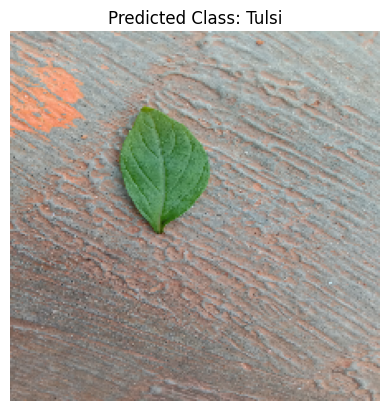

In [37]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle

# Load the saved model using Pickle
saved_model_path = "/content/model198.pkl"  # Replace with the path to your saved model
with open(saved_model_path, "rb") as file:
    model = pickle.load(file)


# Load the sample image
sample_image_path = "/content/(Splitted)Indian Medicininal Leaves Dataset/test/kamakasturi/IMG_20190929_174753.jpg"  # Replace with the path to your sample image
sample_image = image.load_img(sample_image_path, target_size=(224, 224))  # Assuming input size is 224x224
sample_image_array = image.img_to_array(sample_image)
sample_image_array = np.expand_dims(sample_image_array, axis=0)

# Preprocess the image
sample_image_array /= 255.  # Normalize pixel values
# You may need additional preprocessing steps depending on the requirements of your model

# Use the model to make predictions
predictions = model.predict(sample_image_array)
predicted_class_index = np.argmax(predictions)
predicted_class_name = class_names_leaves[predicted_class_index]

# Interpret the predictions
print("Predicted class:", predicted_class_name)

# Display the sample image
plt.imshow(sample_image)
plt.title("Predicted Class: " + predicted_class_name)
plt.axis("off")
plt.show()